# EDA with python and applying logistic regression

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data

In [135]:
data = pd.read_csv('Titanic-Dataset.csv')

In [136]:
data.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S


# Missing data

In [137]:
data.shape

(891, 12)

In [138]:
data.isnull() # it checks each row, if anyvalue is null it returns true in that feild.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

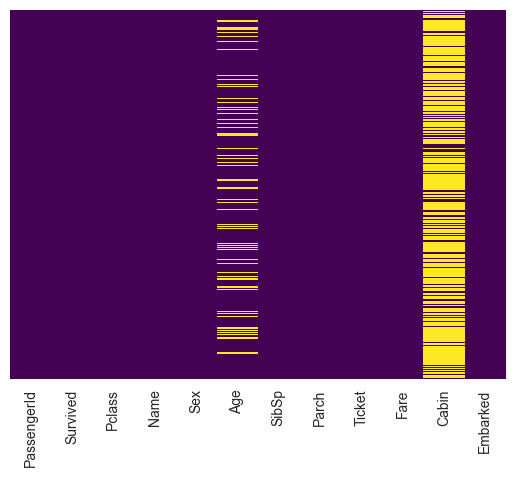

In [139]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

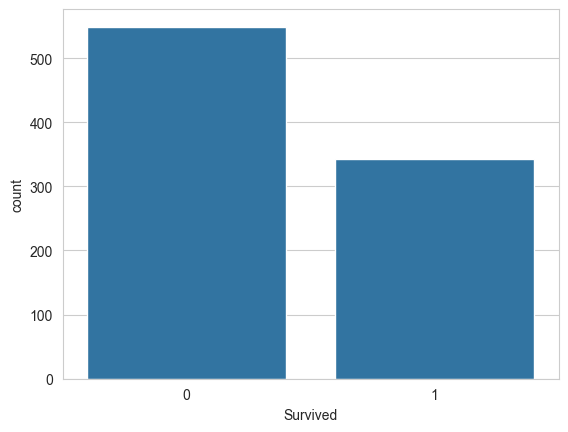

In [140]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data)

<Axes: xlabel='Survived', ylabel='count'>

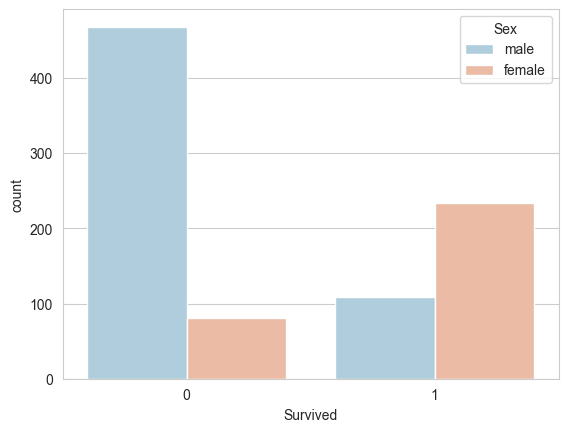

In [141]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

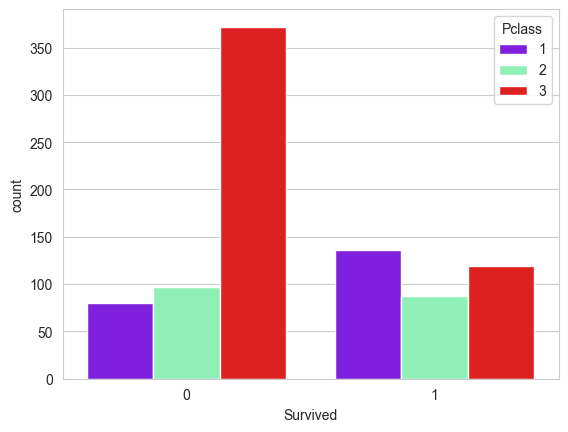

In [142]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=data,palette='rainbow')

## age distribution --
- will get know, max number of people that were in boat

In [143]:
import warnings
warnings.filterwarnings("ignore") 

<Axes: xlabel='Age'>

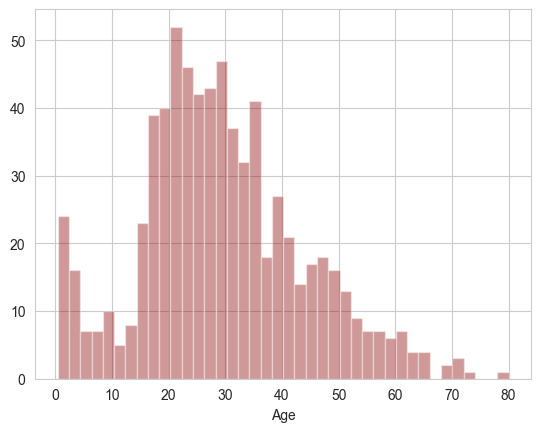

In [144]:
sns.distplot(data['Age'].dropna(),kde=False,color='darkred',bins=40)

<Axes: >

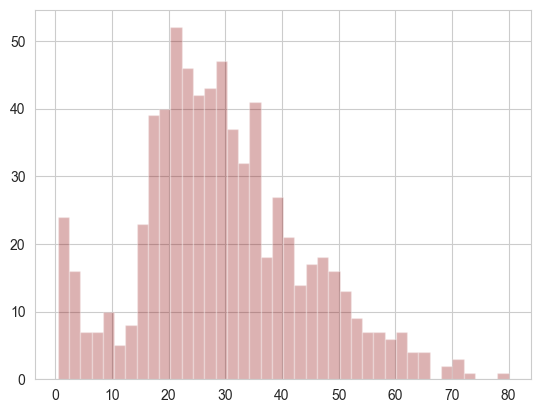

In [145]:
data['Age'].hist(bins=40,color='darkred',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

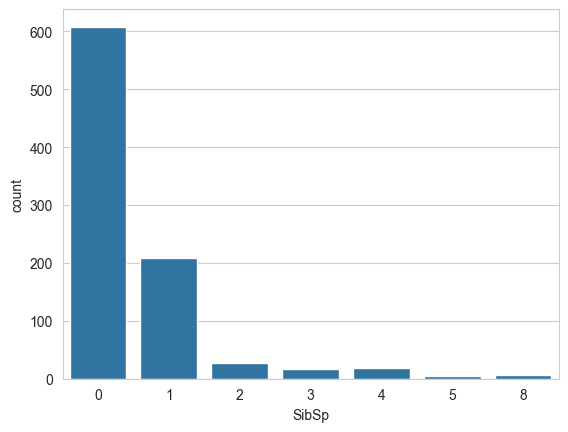

In [146]:
sns.countplot(x='SibSp',data=data)

<Axes: >

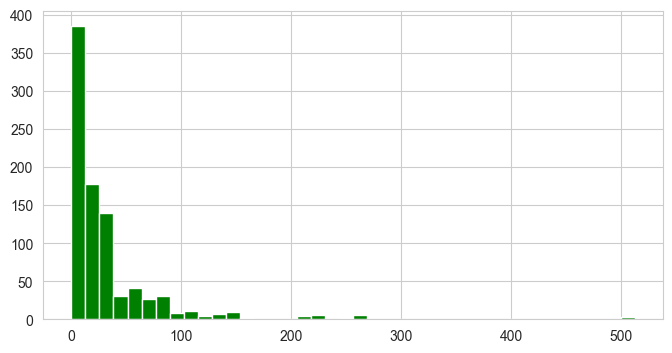

In [147]:
data['Fare'].hist(bins=40,color='green',figsize=(8,4))

# Data cleaning

## null values

- age and cabin
  

- after doing some analysis, we found there is some relation betweem pclass and age 

<Axes: xlabel='Pclass', ylabel='Age'>

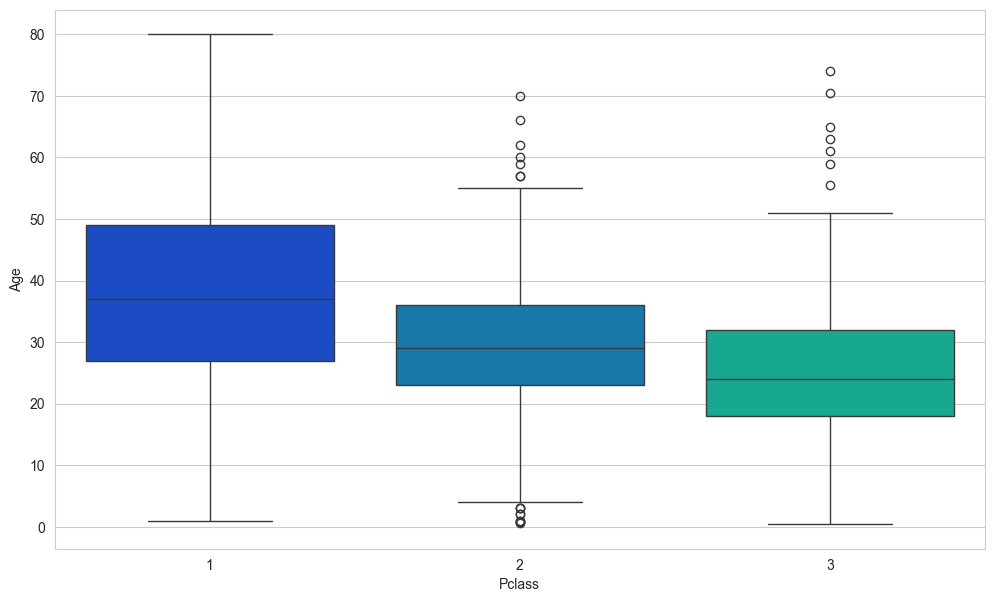

In [148]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=data,palette = 'winter')

we can see the passengers in the higher class tend to be older. which makes sense. we will use these average age values to impute based on Pclass for age.

In [149]:
data['Age'].isnull().sum()

177

In [150]:
data.shape

(891, 12)

In [151]:
data['Age'].mean()

29.69911764705882

In [152]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass ==1:
            return 37
        elif Pclass == 2:
            return 20
        else:
            return 24
    else:
        return Age


    

In [153]:
data['Age']=data[['Age','Pclass']].apply(impute_age,axis=1)

Now lets check heatmap again

<Axes: >

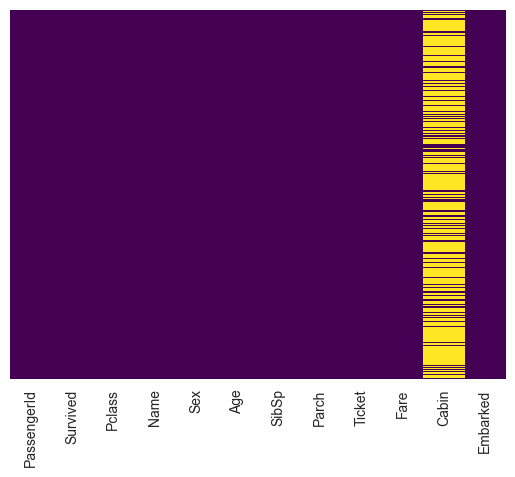

In [154]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

to replace nan values in cabin column we need to lot of feature engineering, as of now will drop the column siince it has sooo many null values

In [155]:
data.drop('Cabin',axis=1,inplace=True)

<Axes: >

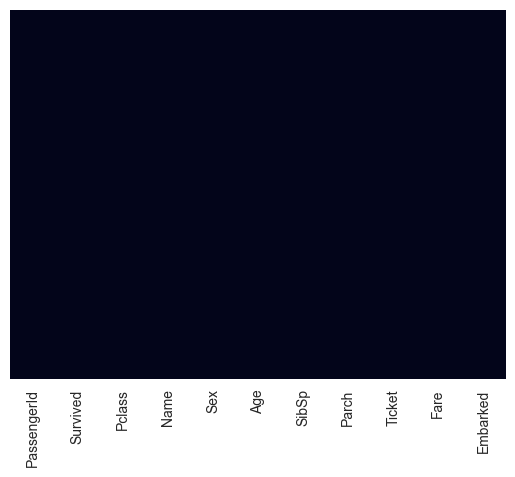

In [156]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,)

In [157]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


will have to consider only required columns  and convert categorical features -- sex --0,1

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [159]:
pd.get_dummies(data['Sex'],drop_first=True).head()

,male
0,True
1,False
2,False
3,False
4,True


In [160]:
pd.get_dummies(data['Sex'],drop_first=True,dtype=int).head()

,male
0,1
1,0
2,0
3,0
4,1


In [161]:
data[['Sex']].head()

,Sex
0,male
1,female
2,female
3,female
4,male


- get dummies is like one hot encoding, and as per analysis we dont require name and ticket columns

In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [167]:
sex=pd.get_dummies(data['Sex'],drop_first=True,dtype=int)
embarked=pd.get_dummies(data['Embarked'],drop_first=True,dtype=int)

In [168]:
sex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   male    891 non-null    int32
dtypes: int32(1)
memory usage: 3.6 KB


In [169]:
data.drop(columns=['Sex','Embarked','Name','Ticket'],inplace=True)

In [170]:
data=pd.concat([data,sex,embarked],axis=1)

In [171]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


- Data is ready for model

# Logistic regression

## train test split

In [172]:
train = data

In [173]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [174]:
from sklearn.model_selection import train_test_split

In [175]:
X_train, X_test,y_train,y_test = train_test_split(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)

In [176]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
520,521,1,30.0,0,0,93.5000,0,0,1
510,511,3,29.0,0,0,7.7500,1,1,0
446,447,2,13.0,0,1,19.5000,0,0,1
2,3,3,26.0,0,0,7.9250,0,0,1
691,692,3,4.0,0,1,13.4167,0,0,0


In [177]:
y_train.head()

520    1
510    1
446    1
2      1
691    1
Name: Survived, dtype: int64

# Training and predicting

In [178]:
from sklearn.linear_model import LogisticRegression

In [179]:
logmodel = LogisticRegression()

In [180]:
X_train.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

<Axes: >

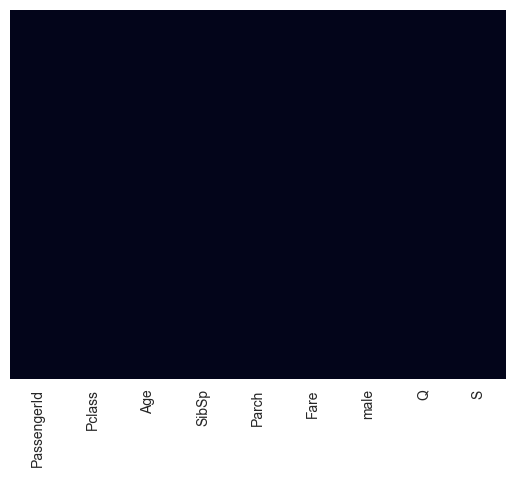

In [181]:
sns.heatmap(X_train.isnull(),yticklabels=False,cbar=False,)

In [182]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [183]:
predictions = logmodel.predict(X_test)

# metrics

In [185]:
from sklearn.metrics import confusion_matrix

In [187]:
accuracy  = confusion_matrix(y_test,predictions)

In [188]:
accuracy

array([[134,  20],
       [ 42,  72]], dtype=int64)

In [190]:
(134+72)/(134+20+42+72)

0.7686567164179104

In [191]:
from sklearn.metrics import accuracy_score

In [193]:
accuracy = accuracy_score(y_test,predictions)

In [194]:
accuracy

0.7686567164179104